In [1]:
import pandas as pd
from sklearn.datasets import load_digits
import numpy as np

In [2]:
data = load_digits()

In [3]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
X = data.data
y = data.target

In [6]:
X.shape,y.shape

((1797, 64), (1797,))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')

In [11]:
classifier.fit(X_train,y_train)

SVC()

In [12]:
pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

In [16]:
round(accuracy_score(y_test,pred),3)

0.989

In [18]:
print('Actual: ',y_test[0:11])
print('Predicted: ',pred[0:11])

Actual:  [9 9 0 2 4 5 7 4 7 2 4]
Predicted:  [9 9 0 2 4 5 7 4 7 2 4]


In [19]:
print('Accuracy: ','{:.2f}'.format((round(accuracy_score(y_test,pred),3)*100)),"%")

Accuracy:  98.90 %


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

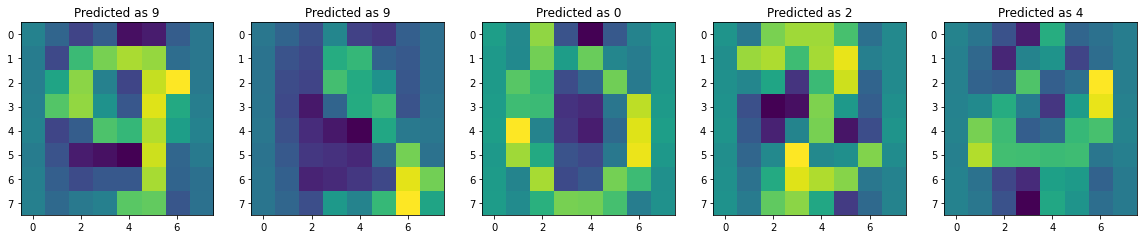

In [36]:
plt.figure(figsize=(20,4))
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(8,8))
    plt.title(f'Predicted as {pred[i]}')